In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units

In [15]:
brickname = '2408p222'
output = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/dr9_test/tractor/240/2408p222/rs0/tractor-2408p222.fits')
Input = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9m/obiwan_out/dr9m_test/divided_randoms/brick_2408p222.fits')[:10]


In [16]:
flux = output['flux_w1']
mwtransmission = output['mw_transmission_w1']
ag= 22.5 - 2.5 * np.log10(flux / mwtransmission)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [17]:
cat1 = SkyCoord(ra=output['ra']*units.degree, dec=output['dec']*units.degree)
cat2 = SkyCoord(ra=Input['ra']*units.degree, dec=Input['dec']*units.degree)
i2, d2d, d3d = cat2.match_to_catalog_sky(cat1,nthneighbor=1) 

In [18]:
np.array(d2d)

array([  8.71289933e-05,   9.87250159e-02,   6.84748741e-06,
         1.15158778e-05,   3.41315187e-03,   6.21084159e-05,
         4.34815227e-06,   5.46544003e-02,   1.32303041e-05,
         5.39609948e-02])

In [20]:
sel = ag[i2]>0
sel1 = np.array(d2d)<2e-4
ag[i2][sel1]

array([ 20.35406494,  21.5544529 ,  21.33474541,  22.43057251,
        20.60943222,  20.40700912], dtype=float32)

Text(0.5,1,'real radec')

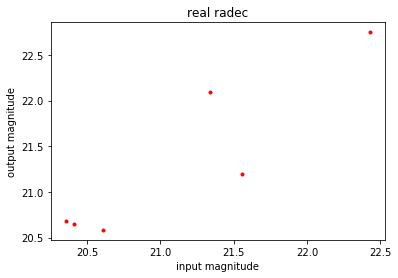

In [27]:
plt.plot(ag[i2][sel&sel1],Input[sel&sel1]['w1'],'r.')
plt.xlabel('input magnitude')
plt.ylabel('output magnitude')
plt.title('real radec')

Text(0.5,1,'real radec')

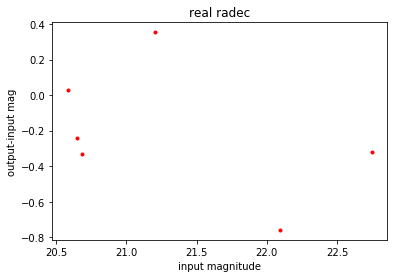

In [26]:
plt.plot(Input[sel&sel1]['w1'],ag[i2][sel*sel1]-Input[sel&sel1]['w1'],'r.')
plt.xlabel('input magnitude')
plt.ylabel('output-input mag')
plt.title('real radec')

In [23]:
input_mag = Input[sel&sel1]['w1']
output_mag = ag[i2][sel*sel1]

ag= 22.5 - 2.5 * np.log10(flux / mwtransmission)

input_flux = 10**(-(input_mag-22.5)/2.5)
output_flux = 10**(-(output_mag-22.5)/2.5)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


Text(0.5,1,'real source')

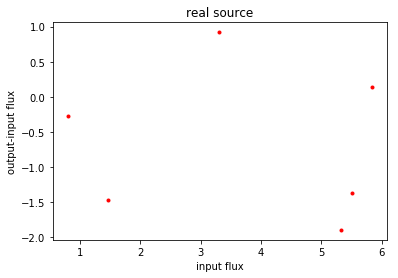

In [25]:
plt.plot(input_flux,input_flux-output_flux,'r.')
plt.xlabel('input flux')
plt.ylabel('output-input flux')
plt.title('real source')
